# ZNEUS PROJECT - DIABETES 130-US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## 1. EXPLORATORY DATA ANALYSIS (EDA)

This dataset represents ten years woth of clinical care data at 130 US hospitals and integrated delivery networks. The instances represent hospitalized patient records diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The main question we will be focusing on is the impact of medication on the stay and readmission of patients.

source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [2]:
df = pd.read_csv("diabetic_data.csv")
pd.set_option("display.max_columns", 60)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


As we can see from the display, we are facing a multitude of problems. For one, the ages and weights have been kept anonymous and have been replaced with a range and question mark sign respectively. There is also redundant data, such as the patient id and encounter id. We will need to get rid of this redundant data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In order for us to clean up the data, we'll need a description of what exactly we are looking at. In the following paragraph, we will be explaining, what each of the columns mean. This will help us with selecting relevant columns for training.

- _encounter_id_: Unique index used to differentiate cases.
- _patient_nbr_, _race_, _gender_, _age_, _weight_: Personal information for each specific patient (name should be explainable).
- _admission_type_id_, _admission_source_id_: Circumstances at which the patient was admitted in.
- _discharge_disposition_, _time_in_hospital_: Circumstances at which the patient was discharged and time of stay.
- _payer_code_: Code of the person, who payed for the procedures.
- _medical_specialty_: Speciality of the physician in charge of the patient.
- _num_lab_procedures_, num_procedures : Number of laboratory and non-laboratory procedures done during the patients stay.
- _num_medications_: Number of generic names administered during the procedures.
- _number_outpatient_, _number_emergency_, _number_inpatient_: Number of visits in the last year preceeding the admission.
- _diag_1-3_, _number_diagnoses_: Number of diagnosses and the primary/secondary/additional secondary diagnosesses.
- _max_glu_serum_: Indicates the result of the glu_serum test, alternatively, wheter it was taken.
- _A1Cresult_: Indicates the result of the A1C test, alternatively, wheter it was taken.
- _metformin_ - _metformin-pioglitazone_: Indicates wheter the dosage of the given drug has increaased, decreased, stayed same or wasn't prescribed at all.
- _change_, _diabetesMed_: Indicates change in the diabetic medication and if any drugs were prescribed.
- _readmitted_: Indicates if and when a patient had been readmitted after treatment.

Using info(), we can see that the dataset contains 50 columns in total, which is good, because we can train the network more efficiently this way. 

Most of the data are either obejcts or ints, which is perfect for us. From the previous viewing, we can see, that the object data is mostly of the Up/Down/Steady/No variety. We'll be transforming these columns to mathematical constants (e.g. Up = 1, Down = 0, Steady = 0.5, No = -1)

We can notice, that the _max_glu_serum_ and _A1Cresult_ columns contain a lot of null-values. While the other values do not display null-values using this method, we can still clearly see from the display, that they hide this issue by inserting "?" instead of null-values. I understand this is to protect sensitive data but it's really annoying for machine learning proccesses.

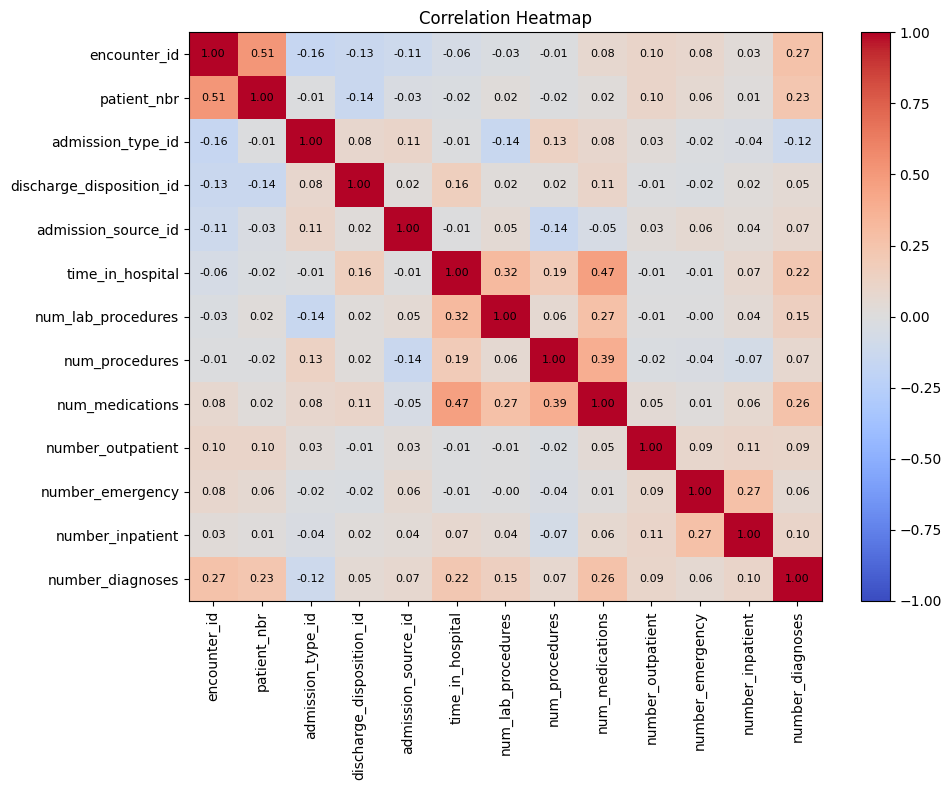

In [5]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

# Pridanie číselných hodnôt do matice
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = plt.text(j, i, f'{corr.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Z heatmapy vidíme, že naše numerické dáta na sebe nie sú veľmi závisle. Medzi najsilnejšími vidíme koreláciu medzi _time_in_hospital_ a _num_medications_, čo asi naznačuje, že čím dlhšie pacient bol v nemocnici, tým vaicej medications vzal. Taktiež vidíme, že _procedures_ a _num_medications_ majú nejakú koreláciu (zrejme, čím viacej procedúr pacient potreboval, tým viacej liekov mal predpísaných), ten istý princíp vidíme aj pri _number_diagnoses_ a _num_medications_. Ostatné dáta sa, avšak zdajú byť irelevantnými.

Podľa insentivy cvičiaceho potrebujeme skontrolovať a tribút _readmitted_, aby sme zistili, či má dostatočný interval rôznych hodnôt.

In [6]:
unique_values = df['readmitted'].unique()
value_counts = df['readmitted'].value_counts()
print(value_counts)
print(unique_values)

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
['NO' '>30' '<30']


Zdá sa, že _readmitted_ má tri stavvy: pacient nemusel znova prísť do nemocnice, pacient prišiel o menej ako mesiac, pacient prišiel po viac ako mesiaci. Vidíme, že <30 je 5x menej, ako NO, čo sa neskôr zobra

# 2. DATA PRE-PROCESSING

Pred *dropnutím* ešte zistujeme aké atribúty obsahujú cenzurované záznamy a koľko

In [7]:
N_rows = df.shape[0]
print("Columns with at least one '?' value:")

# Počítame '?' hodnoty v každom stĺpci
question_mark_counts = df.apply(lambda col: (col == '?').sum())
columns_with_question = question_mark_counts[question_mark_counts > 0]

# Vytvoríme DataFrame pre zobrazenie
question_df = columns_with_question.to_frame()
question_df = question_df.rename(columns={0: 'number of ? values'})
question_df['missing values in %'] = question_df.apply(lambda row: round(row['number of ? values']/N_rows, 4) * 100, axis=1)

print("\nColumns where ALL values are '?':")
print(question_df[question_df['number of ? values'] == N_rows])

print("\nAll columns with '?' values:")
print(question_df)

Columns with at least one '?' value:

Columns where ALL values are '?':
Empty DataFrame
Columns: [number of ? values, missing values in %]
Index: []

All columns with '?' values:
                   number of ? values  missing values in %
race                             2273                 2.23
weight                          98569                96.86
payer_code                      40256                39.56
medical_specialty               49949                49.08
diag_1                             21                 0.02
diag_2                            358                 0.35
diag_3                           1423                 1.40


Vytvorenie kópie dataframe

In [8]:
df_medications = df.copy()

Z kópie sme vynechali všetky dáta ktoré nebudeme potrebovať.

In [9]:
cols_to_keep = df_medications.columns[24:47].tolist() + ['readmitted']
df_medications = df_medications[cols_to_keep]

print(df_medications.shape)
df_medications.head()


(101766, 24)


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,>30
2,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,NO
4,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,NO


Encoding, aby sme mohli ďalej pracovať z hodnotami

In [10]:
le = LabelEncoder()
df['metformin'] = le.fit_transform(df['metformin'])
df['repaglinide'] = le.fit_transform(df['repaglinide'])
df['nateglinide'] = le.fit_transform(df['nateglinide'])
df['chlorpropamide'] = le.fit_transform(df['chlorpropamide'])
df['glimepiride'] = le.fit_transform(df['glimepiride'])
df['acetohexamide'] = le.fit_transform(df['acetohexamide'])
df['glipizide'] = le.fit_transform(df['glipizide'])
df['glyburide'] = le.fit_transform(df['glyburide'])
df['tolbutamide'] = le.fit_transform(df['tolbutamide'])
df['pioglitazone'] = le.fit_transform(df['pioglitazone'])
df['rosiglitazone'] = le.fit_transform(df['rosiglitazone'])
df['acarbose'] = le.fit_transform(df['acarbose'])
df['miglitol'] = le.fit_transform(df['miglitol'])
df['troglitazone'] = le.fit_transform(df['troglitazone'])
df['tolazamide'] = le.fit_transform(df['tolazamide'])
df['insulin'] = le.fit_transform(df['insulin'])
df['examide'] = le.fit_transform(df['examide'])
df['citoglipton'] = le.fit_transform(df['citoglipton'])
df['glyburide-metformin'] = le.fit_transform(df['glyburide-metformin'])
df['glipizide-metformin'] = le.fit_transform(df['glipizide-metformin'])
df['glimepiride-pioglitazone'] = le.fit_transform(df['glimepiride-pioglitazone'])
df['metformin-rosiglitazone'] = le.fit_transform(df['metformin-rosiglitazone'])
df['metformin-pioglitazone'] = le.fit_transform(df['metformin-pioglitazone'])

#Transforming in a binary problem
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

Zistíme si, ktoré premenné majú nejaký vplyv na seba

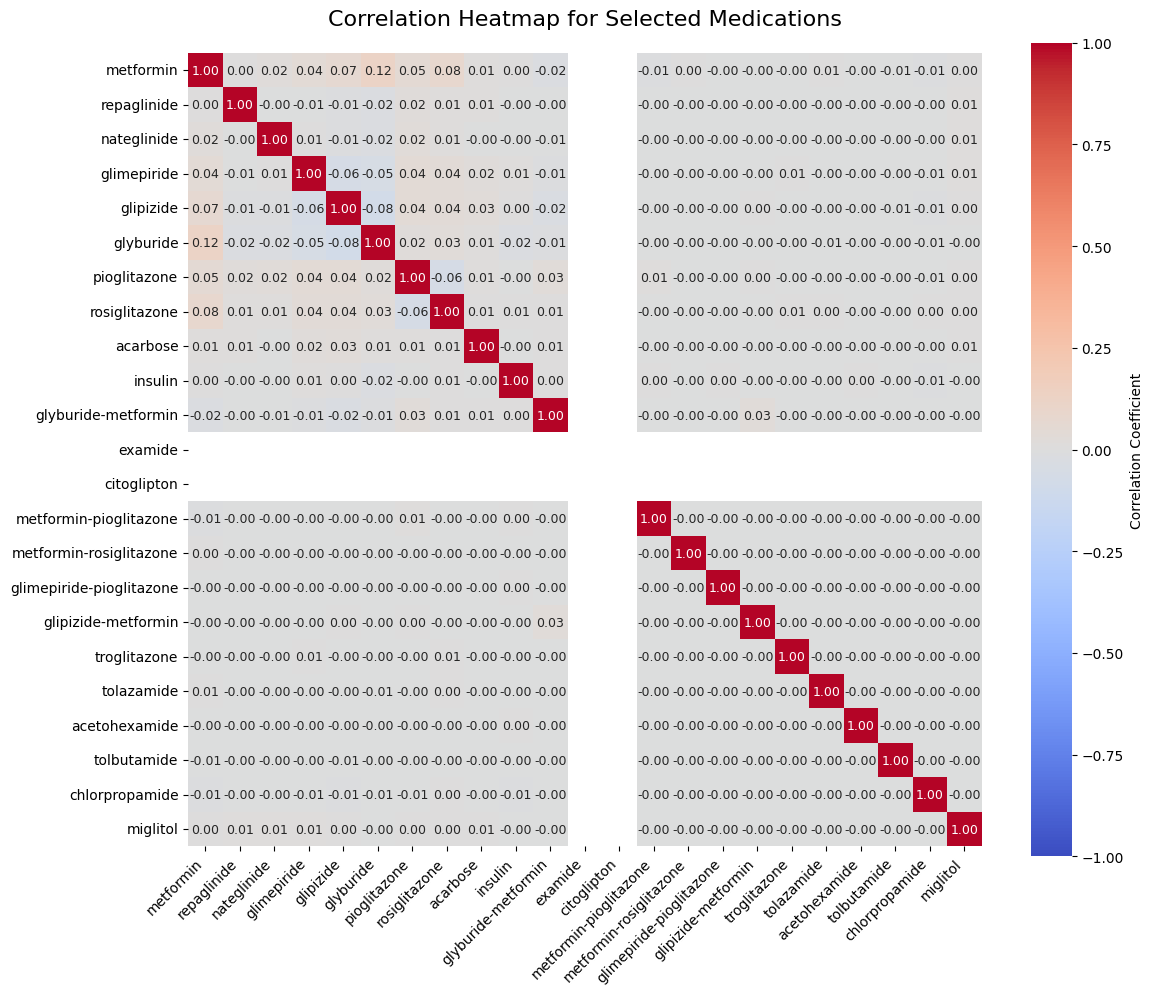

In [11]:
medication_columns = [
   'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 
   'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
   'acarbose', 'insulin', 'glyburide-metformin',
    'examide', 'citoglipton', 'metformin-pioglitazone', 'metformin-rosiglitazone', 
    'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolazamide', 
    'acetohexamide', 'tolbutamide', 'chlorpropamide', 'miglitol'
]
medication_df = df[medication_columns]
df_medications.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(data=medication_df.corr(), 
            annot=True,           
            fmt='.2f',           
            cmap='coolwarm',     
            center=0,            
            vmin=-1, vmax=1,     
            square=True,         
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'size': 9})  

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap for Selected Medications", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [12]:
#df_medications = df_medications.drop(columns=['examide', 'citoglipton', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolazamide', 'acetohexamide', 'tolbutamide', 'chlorpropamide', 'miglitol'], errors='ignore')

In [13]:
medication_counts = pd.DataFrame()

for col in df_medications.columns[:-1]:  
    value_counts = df_medications[col].value_counts().sort_index()
    medication_counts[col] = value_counts

medication_counts = medication_counts.T

medication_counts = medication_counts.fillna(0).astype(int)

print(medication_counts)


metformin                  Down      No  Steady     Up
metformin                   575   81778   18346   1067
repaglinide                  45  100227    1384    110
nateglinide                  11  101063     668     24
chlorpropamide                1  101680      79      6
glimepiride                 194   96575    4670    327
acetohexamide                 0  101765       1      0
glipizide                   560   89080   11356    770
glyburide                   564   91116    9274    812
tolbutamide                   0  101743      23      0
pioglitazone                118   94438    6976    234
rosiglitazone                87   95401    6100    178
acarbose                      3  101458     295     10
miglitol                      5  101728      31      2
troglitazone                  0  101763       3      0
tolazamide                    0  101727      38      1
examide                       0  101766       0      0
citoglipton                   0  101766       0      0
insulin   

Podľa tejto analýzi sme sa rozhodli vynechat `examide` a `citoglipton`, keďže obsahujú iba NO hodnoty. Taktiež vidíme, že dáta nie sú vybalancované, tým pádom musíme použiť nejaký typ scalera.

Použili sme "Synthetic Minority Over-sampling Technique" aka SMOTE, pretože dataset je unbalanced 

In [14]:
sm=SMOTE(sampling_strategy='minority',random_state=42)

In [15]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Now convert to arrays and resample
X_res, y_res = sm.fit_resample(X.values, y.values)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. ASSEMBLING THE NETWORK

In [17]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

Ako posledná vrstva je potrebný Sigmoid, pretože ide o binary classification. ReLU sme vybrali, pretože pracujeme s jednoduchými hodnotami (väčšinou v range <-1,1>).

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Vybrali sme Adam a Cross Entropy, pretože mali najlepšie výsledky.

In [19]:
y_train_onehot = np.eye(2)[y_train.astype(int)]
y_test_onehot = np.eye(2)[y_test.astype(int)]

print(f"Converted y_train shape: {y_train_onehot.shape}")

early_stopper = callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 3,
    restore_best_weights=True
)

history = model.fit(X_train, y_train_onehot,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.1,
                   callbacks=[early_stopper])

Converted y_train shape: (144654, 2)
Epoch 1/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7822 - loss: 0.4619 - val_accuracy: 0.8362 - val_loss: 0.3647
Epoch 2/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8389 - loss: 0.3602 - val_accuracy: 0.8445 - val_loss: 0.3524
Epoch 3/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8473 - loss: 0.3451 - val_accuracy: 0.8464 - val_loss: 0.3532
Epoch 4/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8533 - loss: 0.3364 - val_accuracy: 0.8487 - val_loss: 0.3470
Epoch 5/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8595 - loss: 0.3267 - val_accuracy: 0.8577 - val_loss: 0.3315
Epoch 6/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8615 - loss: 0.3204 - val_accuracy: 0.8563 - val_loss: 0.3321
Epoch 7/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8679 - loss: 0.3122 - val_accuracy: 0.8604 - val_loss: 0.3306
Epoch 8/50
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

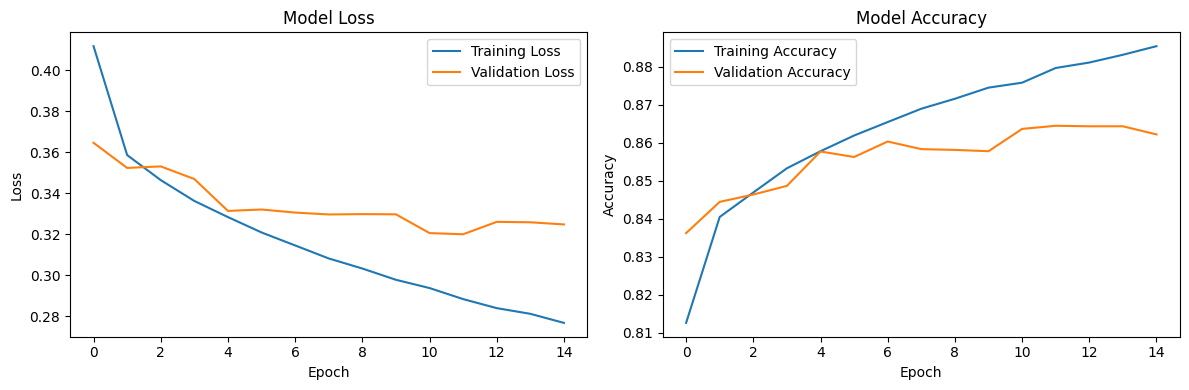

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()